# Clustering stocks using KMeans

<b>Dataset:</b> <i> Company Stock Movements.csv</i>

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

#### Normalizer vs StandardScaler 
Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

## Import Libraries

### Standard Libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  

### Additional Libraries

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from scipy.cluster import hierarchy

## Load and Explore the Dataset

In [7]:
df = pd.read_csv("Company Stock Movements.csv",index_col=0)

In [8]:
df.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [9]:
df.describe()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197502,-0.202501,-0.097504,-0.035000
50%,0.295000,0.010001,-0.005000,0.084993,0.150000,-0.059998,0.070000,0.205002,0.139999,-0.360000,...,0.335005,0.454998,0.035002,0.000000,0.175000,-0.085000,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.804999,1.139999,0.345000,0.192502,0.577495,0.147498,0.382501,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


In [10]:
df.shape

(60, 963)

## Normalize the Dataset

In [11]:
#Instantiate the Standard Scaler
nscaler = Normalizer()

#Fit the scaler to the training set
nscaler.fit(df)

#Transform the training set
df_nscaled = nscaler.transform(df)

## Run K Means
<i> Make sure to use the Normalized dataset and set random_state to 30 </i>

### Find the optimal k

In [12]:
sse = []

for i in range(1,11):
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=30)
    km.fit(df_nscaled)
    sse.append(km.inertia_)

Text(0, 0.5, 'sse')

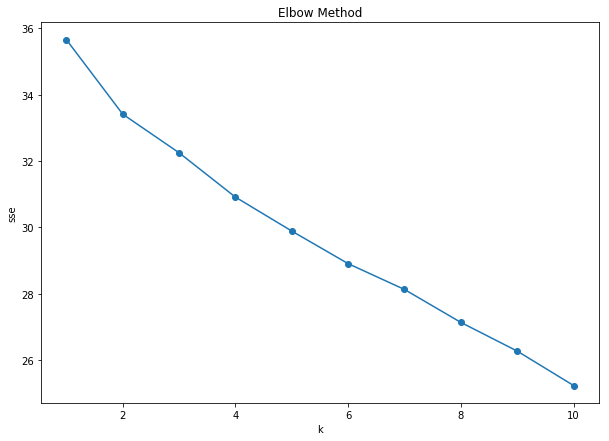

In [13]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("sse")

### Run K Means

In [14]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=30)

#Fit to the data
kmeans.fit(df_nscaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=30, tol=0.0001, verbose=0)

In [15]:
#Output of K-Means is the cluster label
k4_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k4 = df.copy()
df_k4['Label'] = k4_labels

In [16]:
df_k4.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,0
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000,2
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,0
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,2
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998,0


In [17]:
df_k4.Label.value_counts()

1    20
3    17
0    17
2     6
Name: Label, dtype: int64

### List Stocks and their Labels / Clusters in a DataFrame to report which Stocks move together

In [25]:
labels = df_k4.Label
dff = pd.DataFrame({'labels': labels})
dff.sort_values('labels')

,labels
Apple,0
Texas instruments,0
Taiwan Semiconductor Manufacturing,0
Symantec,0
Northrop Grumman,0
Microsoft,0
MasterCard,0
Intel,0
IBM,0
HP,0


In [26]:
zero = dff.loc[dff['labels']==0]
zero

,labels
Apple,0
Amazon,0
Boeing,0
Cisco,0
Dell,0
Google/Alphabet,0
HP,0
IBM,0
Intel,0
Lookheed Martin,0


In [28]:
one = dff.loc[dff['labels']==1]
one

,labels
British American Tobacco,1
Colgate-Palmolive,1
GlaxoSmithKline,1
Home Depot,1
Johnson & Johnson,1
Kimberly-Clark,1
Coca Cola,1
McDonalds,1
Novartis,1
Pepsi,1


In [29]:
two = dff.loc[dff['labels']==2]
two

,labels
AIG,2
American express,2
Bank of America,2
Goldman Sachs,2
JPMorgan Chase,2
Wells Fargo,2


In [30]:
three = dff.loc[dff['labels']==3]
three

,labels
Canon,3
Caterpillar,3
ConocoPhillips,3
Chevron,3
DuPont de Nemours,3
Ford,3
General Electrics,3
Honda,3
3M,3
Mitsubishi,3


## Run Hierarchichal Clustering and Visualize as a Dendogram

In [23]:
#Instantiate the Algorithm
#Linkage performs hierarchical/agglomerative clustering.

linked_full = hierarchy.linkage(df_nscaled, method='ward') 

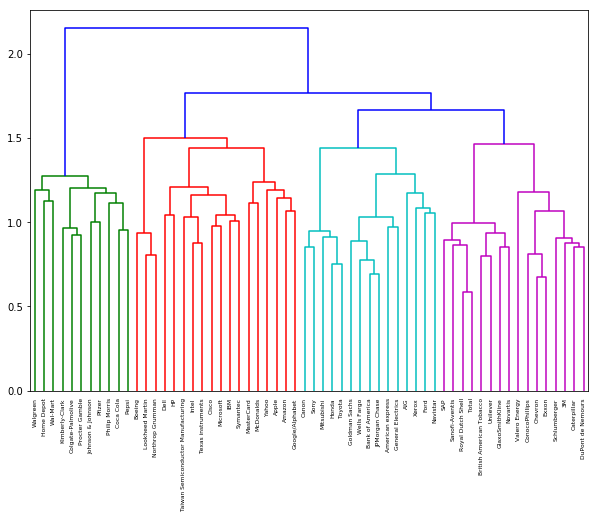

In [24]:
plt.figure(figsize=(10, 7))  
hierarchy.dendrogram(linked_full,  
            orientation='top',
            labels=df_k4.index,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  